#  25. Part 4 - Classification Code Along

Will perform classification with TensorFlow
Will identify and deal with overfitting through early stop callbacks and dropout layers

Dropoout layers can be added to layers to turn off neurons during training to prevent overfitting. 
Each dropout will "drop" a user-defined percent of neurons in the previous layer every batch. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('TensorFlow_FILES/DATA/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
df.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

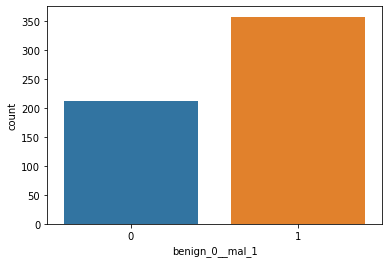

In [6]:
sns.countplot(x='benign_0__mal_1', data=df) #checking to see if there is an imbalance in the occurence of the target features.
#mostly balanced. 

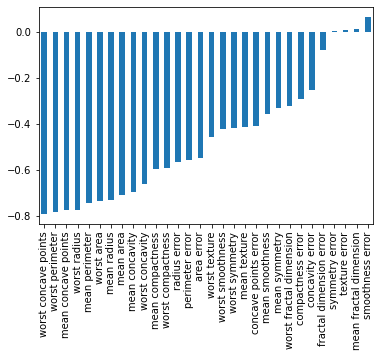

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

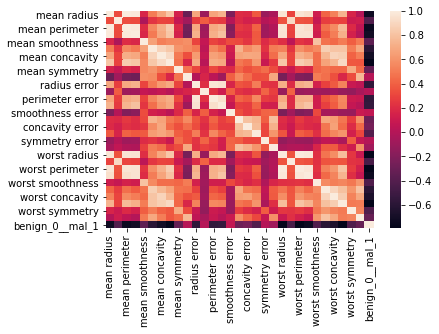

In [11]:
sns.heatmap(df.corr())

In [13]:
#train test split
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [14]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler()

In [43]:
X_train = scaler.fit_transform(X_train)

In [44]:
X_test = scaler.transform(X_test)

In [21]:
#PART TWO - Create a model and deal with over fitting

In [22]:
from tensorflow.keras.models import Sequentialquential

In [23]:
from tensorflow.keras.layers import Dense,Dropout

In [45]:
X_train.shape

(426, 30)

In [46]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#binary claassification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [47]:
type(y_test)

numpy.ndarray

In [48]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 27ms/step - loss: 0.6938 - val_loss: 0.6825
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6729 - val_loss: 0.6645
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6522 - val_loss: 0.6427
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6262 - val_loss: 0.6148
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5915 - val_loss: 0.5757
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5489 - val_loss: 0.5275
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4975 - val_loss: 0.4717
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4437 - val_loss: 0.4174
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3931 - val_loss: 0.3676
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3494 - val_loss: 0.3257
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0548 - val_loss: 0.1026
Epoch 83/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0513 - val_loss: 0.1113
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0533 - val_loss: 0.1072
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0518 - val_loss: 0.1045
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0524 - val_loss: 0.1100
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0515 - val_loss: 0.1104
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0510 - val_loss: 0.1041
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0513 - val_loss: 0.1092
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0538 - val_loss: 0.1055
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0560 - val_loss: 0.1017
Epoch 92/600


14/14 [==============================] - 0s 4ms/step - loss: 0.0438 - val_loss: 0.1214
Epoch 164/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0420 - val_loss: 0.1262
Epoch 165/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0411 - val_loss: 0.1193
Epoch 166/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0423 - val_loss: 0.1211
Epoch 167/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0438 - val_loss: 0.1166
Epoch 168/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0420 - val_loss: 0.1158
Epoch 169/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0411 - val_loss: 0.1275
Epoch 170/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0422 - val_loss: 0.1221
Epoch 171/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0398 - val_loss: 0.1216
Epoch 172/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0419 - val_loss: 0.1184
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0340 - val_loss: 0.1299
Epoch 245/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0341 - val_loss: 0.1260
Epoch 246/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0350 - val_loss: 0.1310
Epoch 247/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0401 - val_loss: 0.1213
Epoch 248/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0343 - val_loss: 0.1262
Epoch 249/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0342 - val_loss: 0.1264
Epoch 250/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0331 - val_loss: 0.1257
Epoch 251/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0332 - val_loss: 0.1256
Epoch 252/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0336 - val_loss: 0.1289
Epoch 253/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0347 - val_loss: 0.1234
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0293 - val_loss: 0.1288
Epoch 326/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0304 - val_loss: 0.1441
Epoch 327/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0305 - val_loss: 0.1339
Epoch 328/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0299 - val_loss: 0.1340
Epoch 329/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0310 - val_loss: 0.1389
Epoch 330/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0306 - val_loss: 0.1402
Epoch 331/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0297 - val_loss: 0.1446
Epoch 332/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0386 - val_loss: 0.1386
Epoch 333/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0302 - val_loss: 0.1395
Epoch 334/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0326 - val_loss: 0.1279
Epoc

14/14 [==============================] - 0s 8ms/step - loss: 0.0230 - val_loss: 0.1482
Epoch 407/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0234 - val_loss: 0.1571
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0222 - val_loss: 0.1569
Epoch 409/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0230 - val_loss: 0.1564
Epoch 410/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0231 - val_loss: 0.1529
Epoch 411/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0252 - val_loss: 0.1629
Epoch 412/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0225 - val_loss: 0.1584
Epoch 413/600
14/14 [==============================] - ETA: 0s - loss: 0.081 - 0s 7ms/step - loss: 0.0227 - val_loss: 0.1756
Epoch 414/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0230 - val_loss: 0.1563
Epoch 415/600
14/14 [==============================] - 0s 5ms/step - loss: 0.021

Epoch 487/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0193 - val_loss: 0.1814
Epoch 488/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0169 - val_loss: 0.1684
Epoch 489/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0188 - val_loss: 0.1698
Epoch 490/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0180 - val_loss: 0.1736
Epoch 491/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0200 - val_loss: 0.1733
Epoch 492/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0171 - val_loss: 0.1710
Epoch 493/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0185 - val_loss: 0.1784
Epoch 494/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0179 - val_loss: 0.1768
Epoch 495/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0251 - val_loss: 0.1739
Epoch 496/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0186 - val_los

14/14 [==============================] - 0s 6ms/step - loss: 0.0146 - val_loss: 0.2160
Epoch 569/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0142 - val_loss: 0.2062
Epoch 570/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0146 - val_loss: 0.2151
Epoch 571/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0133 - val_loss: 0.2122
Epoch 572/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0139 - val_loss: 0.2072
Epoch 573/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0138 - val_loss: 0.2148
Epoch 574/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0139 - val_loss: 0.2082
Epoch 575/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0131 - val_loss: 0.2078
Epoch 576/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0142 - val_loss: 0.2255
Epoch 577/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0207 - val_loss: 0.2041
Epoc

In [49]:
losses = pd.DataFrame(model.history.history)

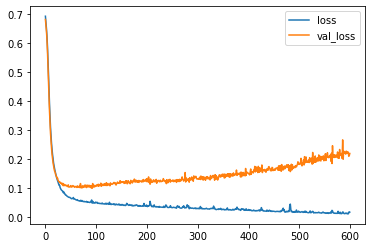

In [50]:
losses.plot()

In [51]:
#loss and val_loss diverge around 25. This tells us that we are overfitting to the dataset. 
#lets use early stopping to stop the training before it ovefits

In [52]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#binary claassification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantit

In [55]:
#use val_loss as a metric to measure. 
#choose a patience parameter - number of epochs to wait to stop once 

In [57]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25) #if accuracy was our metric then we might choose max

In [58]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 26ms/step - loss: 0.7057 - val_loss: 0.6717
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6602 - val_loss: 0.6361
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6177 - val_loss: 0.5970
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5774 - val_loss: 0.5563
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5393 - val_loss: 0.5166
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4967 - val_loss: 0.4714
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4506 - val_loss: 0.4213
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4043 - val_loss: 0.3754
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3638 - val_loss: 0.3351
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3299 - val_loss: 0.3007
Epoch 11

In [59]:
model_loss = pd.DataFrame(model.history.history
                         )

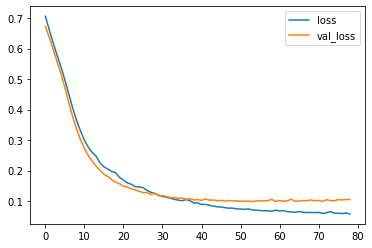

In [60]:
model_loss.plot()

In [62]:
#add in dropout layers 

In [ ]:
from tensorflow.keras.layers import Dropout

In [63]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5)) #input is the fraction of neurons in this layer which will be turned off. 

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5)) 

#binary claassification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
#early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [64]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 27ms/step - loss: 0.6931 - val_loss: 0.6812
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6828 - val_loss: 0.6699
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6708 - val_loss: 0.6591
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6611 - val_loss: 0.6479
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6512 - val_loss: 0.6353
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6363 - val_loss: 0.6214
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6266 - val_loss: 0.6083
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6201 - val_loss: 0.5964
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6076 - val_loss: 0.5811
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5817 - val_loss: 0.5612
Epoch 11

14/14 [==============================] - 0s 7ms/step - loss: 0.1241 - val_loss: 0.1203
Epoch 83/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1262 - val_loss: 0.1058
Epoch 84/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1173 - val_loss: 0.1055
Epoch 85/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1292 - val_loss: 0.1083
Epoch 86/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1449 - val_loss: 0.1115
Epoch 87/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1164 - val_loss: 0.1090
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1089 - val_loss: 0.1083
Epoch 89/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1001 - val_loss: 0.1061
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1223 - val_loss: 0.1054
Epoch 91/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0972 - val_loss: 0.1066
Epoch 92/600


In [65]:
model_loss = pd.DataFrame(model.history.history)

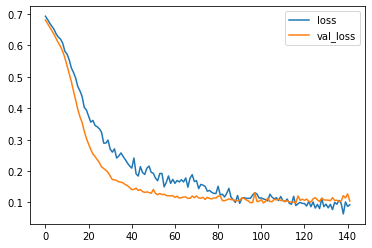

In [66]:
model_loss.plot() 
#this is significantly increased performance relative to the previous two models. 
#training loss and validation loss quickly decline then flatten out together. 

In [71]:
predictions = model.predict_classes(X_test)

In [69]:
from sklearn.metrics import classification_report,confusion_matrix

In [72]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



[[54  1]
 [ 2 86]]
